In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
def imagem_plot(img):
    fig, axes = plt.subplots(1, 1, figsize=(12, 6), sharex=True, sharey=True)
    axes.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.show()

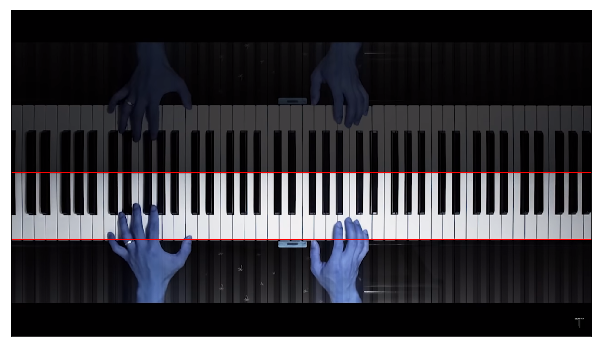

In [3]:
img = cv2.imread("piano.png")
(h, w, c) = img.shape

# Marcar corte
hi = 540
hf = 760
mimg = img.copy()
cv2.line(mimg, (0, hi), (w-1, hi), (255, 0, 0), 2)
cv2.line(mimg, (0, hf), (w-1, hf), (255, 0, 0), 2)

imagem_plot(mimg)

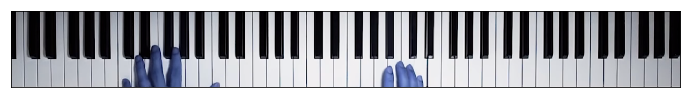

In [4]:
imagem_plot(img[hi:hf,:,:])

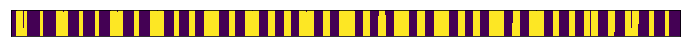

In [28]:
#cropped = img[hi:hf-int((hf-hi)/2),:,:]
cropped = img[hi:hf-int((hf-hi) * 2/3),:,:]

blur = cv2.GaussianBlur(cropped, (5,5), 0)
ret, th = cv2.threshold(cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
keys = cv2.morphologyEx(th, cv2.MORPH_OPEN, np.ones((9,9), np.uint8))
imagem_plot(keys)

mask = np.zeros(cropped.shape)